# 대한민국 대표 기업 공시 채널 : KIND 에서 주식 데이터를 얻었습니다.
# 간략하게 분석해보겠습니다.
### https://kind.krx.co.kr/main.do?method=loadInitPage&scrnmode=1

In [1]:
import pandas as pd
import numpy as np

stock = pd.read_csv("C:/Users/chemy/Desktop/프3프로젝트/주식발행내역.csv")

In [2]:
stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,"23,500",500,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,"259,384",500,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,"20,000",500,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,"873,362",500,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,"1,706,484",500,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,"161,320","1,000",주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,"80,818",500,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,"63,492",500,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,"294,985",500,유상증자(일반공모)


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   회사명      1225 non-null   object
 1   종목코드     1225 non-null   int64 
 2   상장(예정)일  1225 non-null   object
 3   상장방식     1225 non-null   object
 4   발행주식수    1225 non-null   object
 5   액면가      1225 non-null   object
 6   발행사유     1225 non-null   object
dtypes: int64(1), object(6)
memory usage: 67.1+ KB


In [4]:
stock.isna().sum()   # 결측치는 없습니다.

회사명        0
종목코드       0
상장(예정)일    0
상장방식       0
발행주식수      0
액면가        0
발행사유       0
dtype: int64

In [5]:
stock.describe()

,종목코드
count,1225.000000
mean,117291.918367
std,116775.302311
min,220.000000
25%,25440.000000
50%,73570.000000
75%,208640.000000
max,950220.000000


### >>> int형이 종목코드 밖에 없네요...  종목코드의 dtype 을 더 작은 걸로 바꿔줘야할 것 같아요.

In [6]:
stock.describe(include=object) 

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
count,1225,1225,1225,1225,1225,1225
unique,602,62,3,1034,10,35
top,HMM,2021-04-16,추가상장,0,500,국내사모 전환사채 전환
freq,21,42,1068,71,910,313


### 회사명에 왜 HMM 이 21번이나 나올까요?  >>>  있다가 보겠습니다.

In [7]:
stock.발행사유.nunique()

35

In [8]:
stock.상장방식.nunique()

3

### 1. 발행사유, 상장방식은 category 타입으로 바꿔주겠습니다.

In [9]:
stock.액면가.nunique()

10

In [10]:
stock.발행주식수.nunique()

1034

### 2. 액면가, 발행주식수 는 int 형으로 형변환 시켜주겠습니다.
#### >>> sum 도 구할 것이고, 내림차순 정렬해 줄 꺼니까

In [11]:
stock.발행주식수 = stock.발행주식수.str.replace(',','').astype('int64')   
# (발행주식수)에서 3째자리마다 있는, 쉼표를 제거하고, 정수형으로 변환하겠습니다.

In [12]:
stock      #제거 완료!

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,23500,500,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,259384,500,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,20000,500,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,873362,500,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,1706484,500,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,161320,"1,000",주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,80818,500,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,63492,500,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,294985,500,유상증자(일반공모)


In [13]:
# pd.set_option('display.max_rows', None)   # 모든 행 다 출력하기!!   (액면가) 결측치가 있는지 확인해야겟습니다.

In [14]:
stock.액면가

0         500
1         500
2         500
3         500
4         500
        ...  
1220    1,000
1221      500
1222      500
1223      500
1224      500
Name: 액면가, Length: 1225, dtype: object

In [15]:
stock.액면가.isnull().sum()

0

### 결측치는 0으로 처리하고, 쉼표도  제거하겠습니다

In [16]:
stock.액면가 = stock.액면가.str.replace(',','').replace('-','0').astype('float64')

In [17]:
stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,23500,500.0,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,259384,500.0,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,20000,500.0,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,873362,500.0,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,1706484,500.0,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,161320,1000.0,주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,80818,500.0,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,63492,500.0,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,294985,500.0,유상증자(일반공모)


In [18]:
stock = stock.dropna()
stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,23500,500.0,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,259384,500.0,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,20000,500.0,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,873362,500.0,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,1706484,500.0,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,161320,1000.0,주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,80818,500.0,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,63492,500.0,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,294985,500.0,유상증자(일반공모)


### 1. 액면분할을 적게한 주식 (액면가가 높은) 순으로, 시가총액 큰 순으로 보겠습니다.

In [19]:
stock.액면가.nunique()

9

In [20]:
stock.nlargest(100, '액면가').nsmallest(100, '발행주식수')

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
69,디지탈옵틱,106520,2021-05-14,변경상장,-50767096,1000.0,감자(무상)
430,우성사료,6980,2021-04-19,변경상장,-27810000,5000.0,액면병합
822,미래에셋증권,6800,2021-03-24,변경상장,-10000000,5000.0,주식소각
1071,현대모비스,12330,2021-03-02,변경상장,-261600,5000.0,주식소각
569,ES큐브,50120,2021-04-13,변경상장,0,5000.0,상호변경
...,...,...,...,...,...,...,...
22,기업은행,24110,2021-05-17,추가상장,5636227,5000.0,유상증자(제3자배정)
740,HMM,11200,2021-03-31,추가상장,9443599,5000.0,국내CB전환
894,한화솔루션,9830,2021-03-18,추가상장,31414000,5000.0,유상증자(구주주배정)
542,두산중공업,34020,2021-04-14,추가상장,47843956,5000.0,유상증자(제3자배정)


In [21]:
stock.액면가.sort_values(ascending=False)

652    5000.0
564    5000.0
136    5000.0
511    5000.0
510    5000.0
        ...  
631       0.0
636       0.0
635       0.0
633       0.0
632       0.0
Name: 액면가, Length: 1225, dtype: float64

<AxesSubplot:>

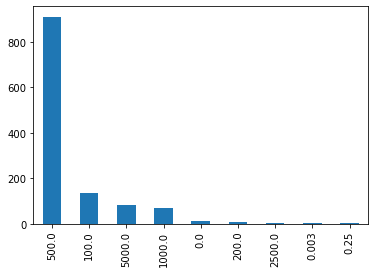

In [22]:
stock.액면가.value_counts().plot(kind='bar')    # 원래 주식은 기본적으로, 5000원짜리 주식인데, 500원짜리가 제일 많네요. 10분할 한거네요.

In [23]:
stock.nsmallest(20, '액면가')    # 액면가 제일 작은 것들은, 신규상장 주식이어서, 표시가 안돼있네요.

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
631,KBSTAR 미국S&P500,379780,2021-04-09,신규상장,900000,0.000,신규상장
632,KBSTAR 유로스탁스50(H),379790,2021-04-09,신규상장,800000,0.000,신규상장
633,KODEX 미국S&P500TR,379800,2021-04-09,신규상장,4000000,0.000,신규상장
634,KODEX 미국나스닥100TR,379810,2021-04-09,신규상장,4000000,0.000,신규상장
635,TIGER 미국테크TOP10 INDXX,381170,2021-04-09,신규상장,1400000,0.000,신규상장
636,TIGER 미국필라델피아반도체나스닥,381180,2021-04-09,신규상장,1400000,0.000,신규상장
724,KINDEX Fn5G플러스,380340,2021-04-02,신규상장,1000000,0.000,신규상장
725,HANARO Fn전기&수소차,381560,2021-04-02,신규상장,800000,0.000,신규상장
726,HANARO Fn친환경에너지,381570,2021-04-02,신규상장,800000,0.000,신규상장
933,네오이뮨텍,950220,2021-03-16,신규상장,98392010,0.000,신규


### xls 파일에서는, 칼럼이 2층이긴한데, 보이긴 보였는데, csv 파일로 변환을 해주니, 칼럼 명에 오류가 생깁니다.
### 그런데, 여기서는, 어떻게 해줄 수 있을까요?

### 칼럼 명이 이상하죠?

In [24]:
from IPython.display import Image

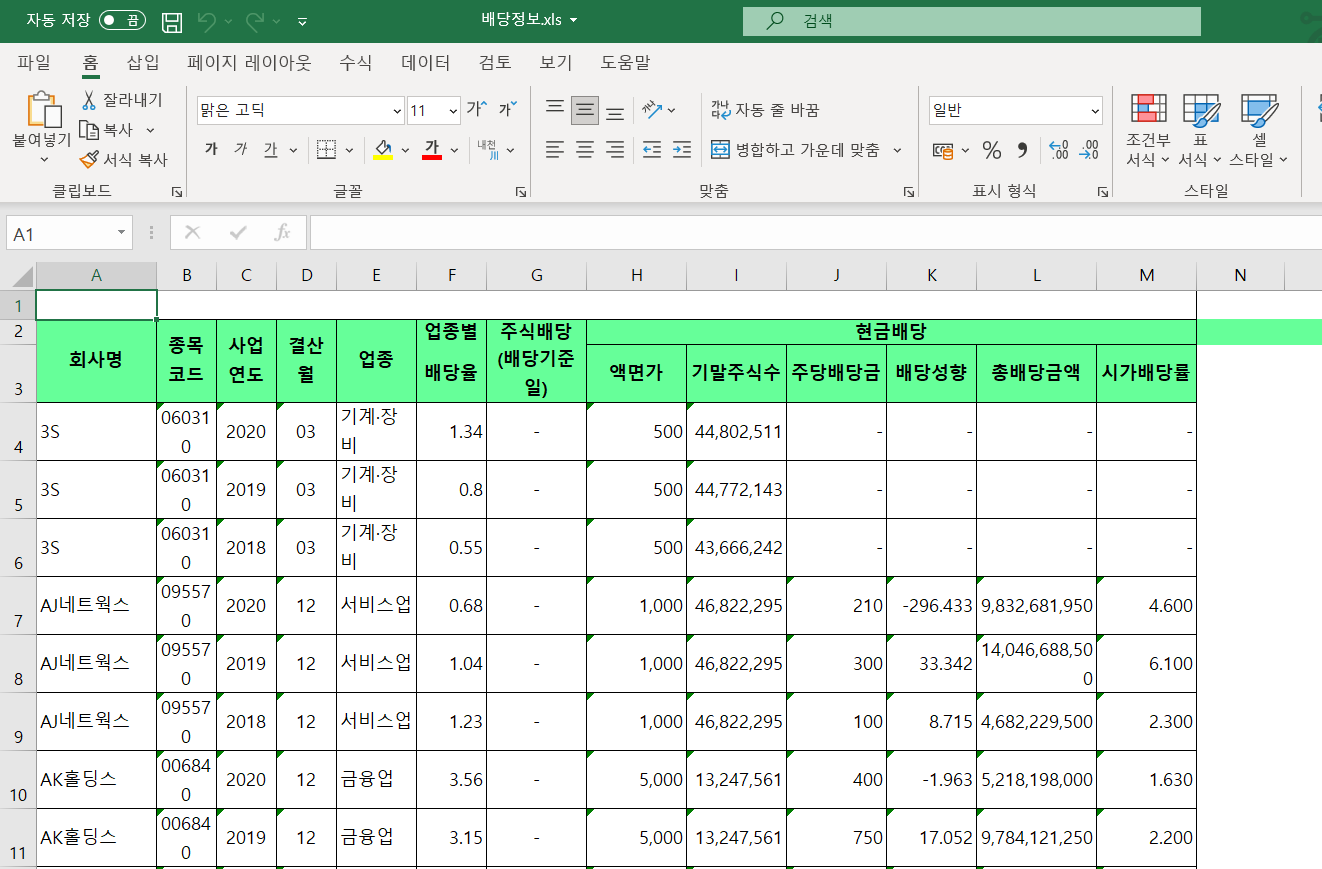

In [25]:
Image("C:/Users/chemy/Desktop/프3프로젝트/1.png")

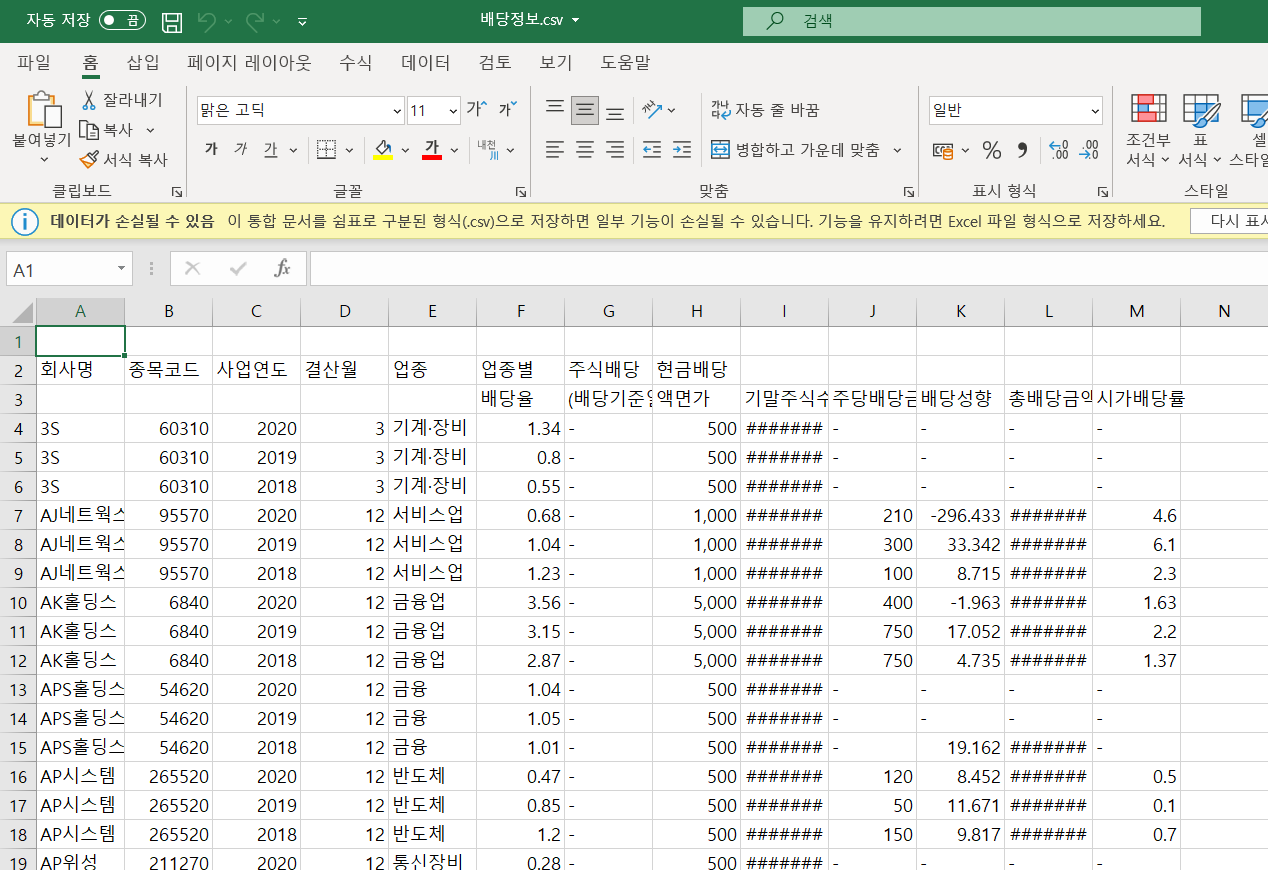

In [26]:
Image("C:/Users/chemy/Desktop/프3프로젝트/2.png")

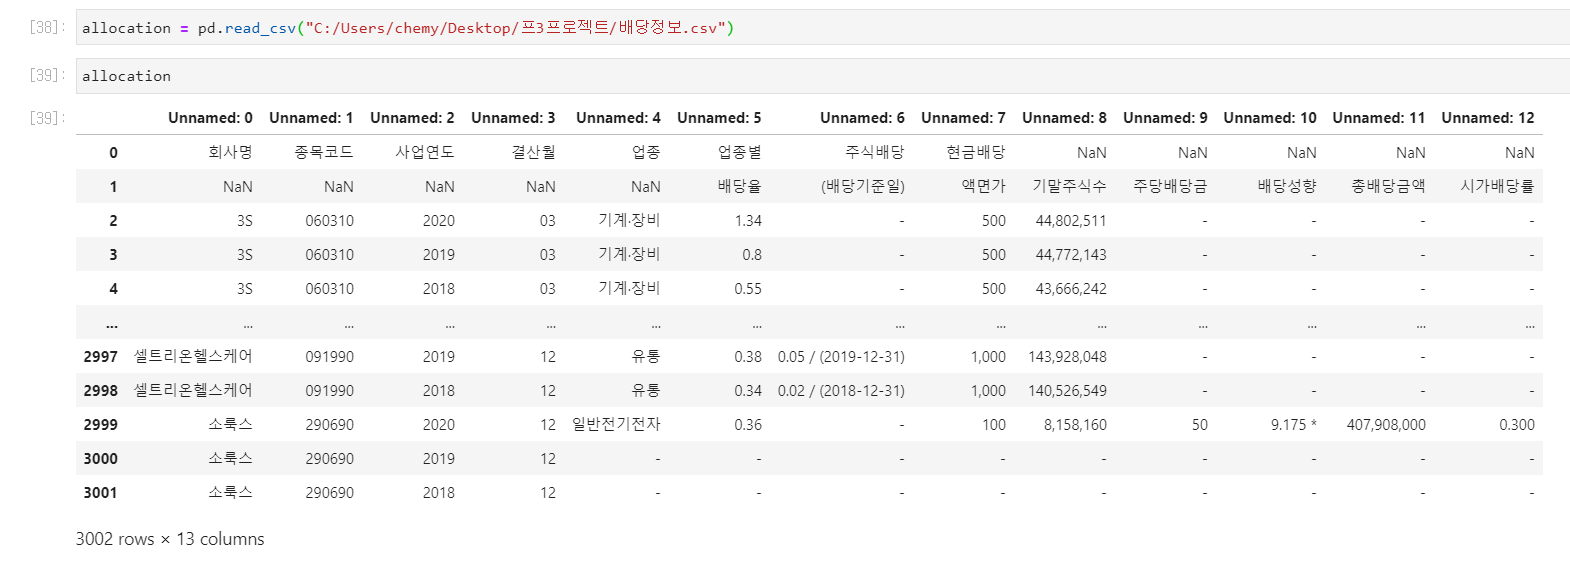

In [27]:
Image("C:/Users/chemy/Desktop/프3프로젝트/3.png")

### 그런데 컬럼 이름이 이상해졌네요. 고쳐봅시다.

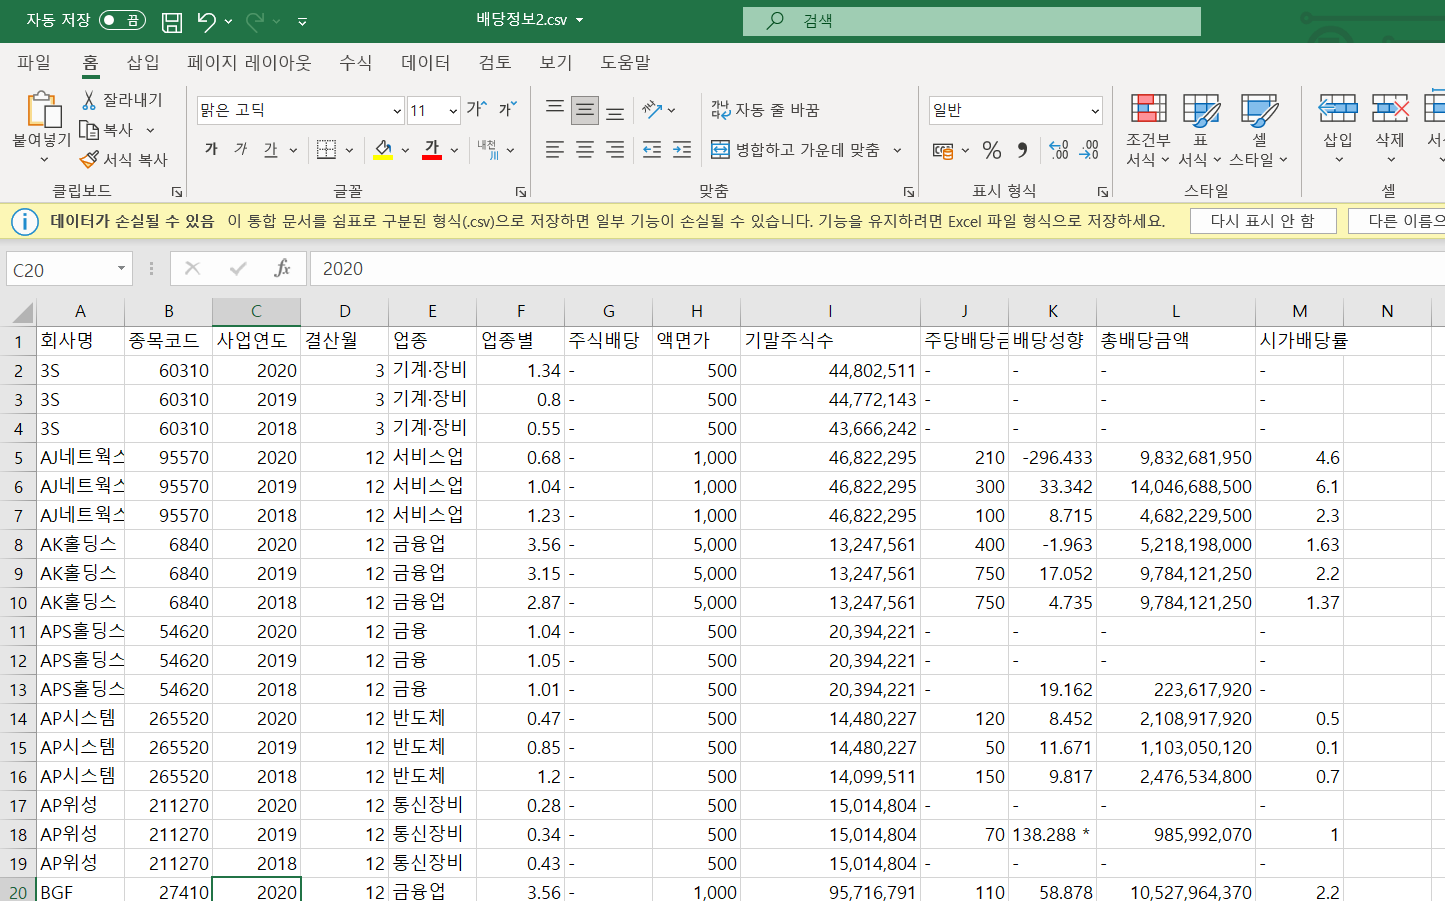

In [28]:
Image("C:/Users/chemy/Desktop/프3프로젝트/4.png")

## csv 파일에서, 아예 컬럼을 정리해주겠습니다

In [29]:
allocation = pd.read_csv("C:/Users/chemy/Desktop/프3프로젝트/배당정보2.csv")

In [30]:
allocation

,회사명,종목코드,사업연도,결산월,업종,업종별,주식배당,액면가,기말주식수,주당배당금,배당성향,총배당금액,시가배당률
0,3S,60310,2020,3,기계·장비,1.34,-,500,"44,802,511",-,-,-,-
1,3S,60310,2019,3,기계·장비,0.8,-,500,"44,772,143",-,-,-,-
2,3S,60310,2018,3,기계·장비,0.55,-,500,"43,666,242",-,-,-,-
3,AJ네트웍스,95570,2020,12,서비스업,0.68,-,"1,000","46,822,295",210,-296.433,"9,832,681,950",4.6
4,AJ네트웍스,95570,2019,12,서비스업,1.04,-,"1,000","46,822,295",300,33.342,"14,046,688,500",6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,셀트리온헬스케어,91990,2019,12,유통,0.38,0.05 / (2019-12-31),"1,000","143,928,048",-,-,-,-
2996,셀트리온헬스케어,91990,2018,12,유통,0.34,0.02 / (2018-12-31),"1,000","140,526,549",-,-,-,-
2997,소룩스,290690,2020,12,일반전기전자,0.36,-,100,"8,158,160",50,9.175 *,"407,908,000",0.3
2998,소룩스,290690,2019,12,-,-,-,-,-,-,-,-,-


### 항목에 대해서, 간략히 알아봅시다.
### 그리고, 이게 제대로 된 데이터인지, 살펴봅시다.
### 1. '업종별' 은 무슨 항목인가?
### 2. '결산월' 은 무엇인가?   매년 몇 월에 결산하냐는 것이다.
### 3. '주식배당' 항목과 '시가배당률' 의 차이는?
### 4. '기말주식수' 는 무엇인가?  설마 저게 주식 총 갯수는 아니지 않겠나?  그러면 너무 많지..
### 5. '배당성향' 은 무엇인가? 

In [31]:
# 1. 아까랑 동일하게, 액면가 & 기말주식수 & 총배당금액 형변환!
# 2. 같은 회사 데이터 중에 최신 2020 데이터만 따로 남기기.  - 사업연도 내림차순 1개씩만
# 3. 

In [32]:
alloc = allocation
alloc.액면가 = alloc.액면가.str.replace(',','').replace('-','0').astype('float64')

In [33]:
alloc.기말주식수 = alloc.기말주식수.str.replace(',','').replace('-','0').astype('int64') 

In [34]:
alloc

,회사명,종목코드,사업연도,결산월,업종,업종별,주식배당,액면가,기말주식수,주당배당금,배당성향,총배당금액,시가배당률
0,3S,60310,2020,3,기계·장비,1.34,-,500.0,44802511,-,-,-,-
1,3S,60310,2019,3,기계·장비,0.8,-,500.0,44772143,-,-,-,-
2,3S,60310,2018,3,기계·장비,0.55,-,500.0,43666242,-,-,-,-
3,AJ네트웍스,95570,2020,12,서비스업,0.68,-,1000.0,46822295,210,-296.433,"9,832,681,950",4.6
4,AJ네트웍스,95570,2019,12,서비스업,1.04,-,1000.0,46822295,300,33.342,"14,046,688,500",6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,셀트리온헬스케어,91990,2019,12,유통,0.38,0.05 / (2019-12-31),1000.0,143928048,-,-,-,-
2996,셀트리온헬스케어,91990,2018,12,유통,0.34,0.02 / (2018-12-31),1000.0,140526549,-,-,-,-
2997,소룩스,290690,2020,12,일반전기전자,0.36,-,100.0,8158160,50,9.175 *,"407,908,000",0.3
2998,소룩스,290690,2019,12,-,-,-,0.0,0,-,-,-,-


In [50]:
alloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     3000 non-null   object 
 1   종목코드    3000 non-null   int64  
 2   사업연도    3000 non-null   int64  
 3   결산월     3000 non-null   int64  
 4   업종      3000 non-null   object 
 5   업종별     3000 non-null   object 
 6   주식배당    3000 non-null   object 
 7   액면가     3000 non-null   float64
 8   기말주식수   3000 non-null   int64  
 9   주당배당금   3000 non-null   object 
 10  배당성향    3000 non-null   object 
 11  총배당금액   3000 non-null   object 
 12  시가배당률   3000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 304.8+ KB


In [55]:
alloc.사업연도 = alloc.사업연도.astype('int16')

In [97]:
alloc.사업연도.astype('int8')

0      -28
1      -29
2      -30
3      -28
4      -29
        ..
2995   -29
2996   -30
2997   -28
2998   -29
2999   -30
Name: 사업연도, Length: 3000, dtype: int8

In [98]:
alloc.사업연도.astype('int16')

0       2020
1       2019
2       2018
3       2020
4       2019
        ... 
2995    2019
2996    2018
2997    2020
2998    2019
2999    2018
Name: 사업연도, Length: 3000, dtype: int16

In [99]:
alloc.결산월.nlargest(2000)   # 거의 다 12월이네요. 

3       12
4       12
5       12
6       12
7       12
        ..
2037    12
2038    12
2039    12
2040    12
2041    12
Name: 결산월, Length: 2000, dtype: int8

In [69]:
alloc.결산월.nunique()    # category 로 할지,

6

In [83]:
alloc.결산월.astype('int8')  # int8 로 할지, 비교해보자.

0        3
1        3
2        3
3       12
4       12
        ..
2995    12
2996    12
2997    12
2998    12
2999    12
Name: 결산월, Length: 3000, dtype: int8

In [90]:
alloc.결산월 = alloc.결산월.astype('category')

In [91]:
alloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   회사명     3000 non-null   object  
 1   종목코드    3000 non-null   int64   
 2   사업연도    3000 non-null   int16   
 3   결산월     3000 non-null   category
 4   업종      3000 non-null   object  
 5   업종별     3000 non-null   object  
 6   주식배당    3000 non-null   object  
 7   액면가     3000 non-null   float64 
 8   기말주식수   3000 non-null   int64   
 9   주당배당금   3000 non-null   object  
 10  배당성향    3000 non-null   object  
 11  총배당금액   3000 non-null   object  
 12  시가배당률   3000 non-null   object  
dtypes: category(1), float64(1), int16(1), int64(2), object(8)
memory usage: 266.9+ KB


In [92]:
alloc.결산월 = alloc.결산월.astype('int8')

In [94]:
alloc.info()     # 그게 그건데, int8 이 0.2 만큼 작다. 이걸로 하자!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     3000 non-null   object 
 1   종목코드    3000 non-null   int64  
 2   사업연도    3000 non-null   int16  
 3   결산월     3000 non-null   int8   
 4   업종      3000 non-null   object 
 5   업종별     3000 non-null   object 
 6   주식배당    3000 non-null   object 
 7   액면가     3000 non-null   float64
 8   기말주식수   3000 non-null   int64  
 9   주당배당금   3000 non-null   object 
 10  배당성향    3000 non-null   object 
 11  총배당금액   3000 non-null   object 
 12  시가배당률   3000 non-null   object 
dtypes: float64(1), int16(1), int64(2), int8(1), object(8)
memory usage: 266.7+ KB


In [103]:
alloc.주식배당.sum()

'--------------------------------------------------------------------------------------------------------0.0239077 / (2018-12-31)--------------------------------------------------------------------------------------------------0.02 / (2018-12-31)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------0.07 / (2020-12-31)-0.05 / (2018-12-31)---------------------------------------------------------------------------0.3 / (2020-12-31)------------------------------0.01 / (2019-12-31)0.01 / (2018-12-31)--------------------------------------------------0.03 / (2018-12-31)--0.03 / (2018-12-31)---------------------0.0220324 / (2020-12-31)0.030816 / (2019-12-31)---------------------------------0.02 / (2018-12-31)------------------0.02 / (2020-12-31)0.02 / (2019-12-31)------------------------------------------------------------------------------------------------------

In [106]:
alloc.시가배당률.sum()

'---4.66.12.31.632.21.37---0.50.10.7-1-2.220.41.71.61.35.44.63.90.390.50.42.31.91.1--0.51.20.90.58------11.41.1-0.90.8---2.21.51.5---------0.90.90.8---------6.25.75.54.92.72.70.81.312.45.45.54.11.51.41.71.872.051.71---1.21.42.20.71.91.6---0.81.11.30.830.870.94.84.53.5-----0---------1.20.931.62----3.42.29---5.13.63.60.92.03-3.43.12.3--12.61.91.664.23.8---0.90.70.72.31.80.83.93.2-2.22.41.42.41.91---3.1-1---------------0.60.51.7---6.35.33.20.50.81.262.412.552.32-1.270.910.91.10.81.531.421.190.4160.6710.399---3.94.542.33.75.22.22.31.8222.30.791.232.07----0.441.92------1.83.2930.9--2.23.22.71.82.051.91.732--2.3---------2.12.22.1-1.31.6---0.691.692.9---4.84.43.94.94.74.2---2.873.513.514.66.3----3.63.153.543.123.863.130.560.670.923.42.7232.92.8---1.621.60.70.90.83.72.82.30.40.220.351.111.20.30.40.41.91.20.81.20.61.731.91.5232.5---2.62.32.84.15.66---0.10.20.3---1.4------11.263.83.71.51.111.21.71.751.972.242.18--0.78---20.92.60.61.11.090.230.570.88---5--00.20.7---3.11.51.7-0.7------1.50.82.8---